In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl

Requirement already up-to-date: scikit-learn in c:\users\asus\anaconda3\lib\site-packages (1.3.2)
Requirement already up-to-date: threadpoolctl in c:\users\asus\anaconda3\lib\site-packages (3.3.0)


In [2]:
!pip install -q yellowbrick==1.5 pandas==1.5 numpy==1.22 scikit-learn matplotlib==3.6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
data_netflix = pd.read_csv('netflix_titles.csv')
data_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
data_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
data_netflix = data_netflix.rename(columns={'date_added': 'date_added_platform', 'duration': 'duration_seconds', 'listed_in': 'gender_type', 'type': 'movie_or_tv_show'})
data_netflix[:5]

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
data_netflix.drop(columns=['rating', 'show_id'], axis=1, inplace=True)

In [11]:
data_netflix['cast'] = data_netflix['cast'].fillna('uninformed cast')
data_netflix['director'] = data_netflix['director'].fillna('uninformed director')
data_netflix['country'] = data_netflix['country'].fillna('uninformed country')

In [12]:
data_netflix.isnull().sum()

movie_or_tv_show        0
title                   0
director                0
cast                    0
country                 0
date_added_platform    10
release_year            0
duration_seconds        3
gender_type             0
description             0
dtype: int64

In [13]:
if 'Documentaries' != 'documentaries':
    print('True')
else:
    print('False')

True


In [14]:
data_netflix['gender_type'] =  data_netflix['gender_type'].apply(lambda x: x.upper())

In [15]:
data_netflix.tail(60)

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description
8747,TV Show,Winsanity,uninformed director,Donald Faison,United States,"December 15, 2018",2016,1 Season,REALITY TV,Actor Donald Faison hosts this game show in wh...
8748,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,86 min,"CLASSIC MOVIES, DRAMAS","After the death of a long-ago lover, married p..."
8749,TV Show,Winter Sun,uninformed director,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Turkey,"August 1, 2017",2014,1 Season,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV THRILLERS",Years after ruthless businessmen kill his fath...
8750,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",2010,100 min,"DRAMAS, INDEPENDENT MOVIES","In this unflinching noir drama, a resilient te..."
8751,Movie,Wish I Was Here,Zach Braff,"Zach Braff, Kate Hudson, Donald Faison, Joey K...",United States,"August 16, 2018",2014,106 min,"COMEDIES, DRAMAS, INDEPENDENT MOVIES","With his acting career moribund, Aidan Bloom s..."
8752,Movie,Wish Man,Theo Davies,"Andrew Steel, Kirby Bliss Blanton, Tom Sizemor...",United States,"December 3, 2019",2019,108 min,"CHILDREN & FAMILY MOVIES, DRAMAS","After surviving a life-threatening accident, a..."
8753,Movie,Withdrawn,Adrian Murray,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",Canada,"May 1, 2018",2017,74 min,"DRAMAS, INDEPENDENT MOVIES",Unable to pay bills and unwilling to change hi...
8754,Movie,Wolves,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",United States,"March 29, 2019",2016,109 min,"DRAMAS, INDEPENDENT MOVIES, SPORTS MOVIES",A promising high school basketball player has ...
8755,TV Show,Women Behind Bars,uninformed director,uninformed cast,United States,"November 1, 2016",2010,3 Seasons,"CRIME TV SHOWS, DOCUSERIES",This reality series recounts true stories of w...
8756,Movie,Woodstock,Barak Goodman,uninformed cast,United States,"August 13, 2019",2019,97 min,"DOCUMENTARIES, MUSIC & MUSICALS",For the 50th anniversary of the legendary Wood...


In [16]:
data_netflix['gender_type']

0                                           DOCUMENTARIES
1         INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES
2       CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...
3                                  DOCUSERIES, REALITY TV
4       INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...
                              ...                        
8802                       CULT MOVIES, DRAMAS, THRILLERS
8803               KIDS' TV, KOREAN TV SHOWS, TV COMEDIES
8804                              COMEDIES, HORROR MOVIES
8805                   CHILDREN & FAMILY MOVIES, COMEDIES
8806       DRAMAS, INTERNATIONAL MOVIES, MUSIC & MUSICALS
Name: gender_type, Length: 8807, dtype: object

In [17]:
df_split = data_netflix['gender_type'].str.split(',', expand=True)
df_split = df_split.fillna('-')
df_split

,0,1,2
0,DOCUMENTARIES,-,-
1,INTERNATIONAL TV SHOWS,TV DRAMAS,TV MYSTERIES
2,CRIME TV SHOWS,INTERNATIONAL TV SHOWS,TV ACTION & ADVENTURE
3,DOCUSERIES,REALITY TV,-
4,INTERNATIONAL TV SHOWS,ROMANTIC TV SHOWS,TV COMEDIES
...,...,...,...
8802,CULT MOVIES,DRAMAS,THRILLERS
8803,KIDS' TV,KOREAN TV SHOWS,TV COMEDIES
8804,COMEDIES,HORROR MOVIES,-
8805,CHILDREN & FAMILY MOVIES,COMEDIES,-


In [18]:
print(len(df_split.columns))

3


In [19]:
group_dummies = [pd.get_dummies(df_split[y].apply(lambda x: x.strip()), dtype='int') for y in df_split.columns]
group_dummies[0].shape

(8807, 36)

In [20]:
group_dummies = pd.concat(group_dummies, axis=1)
group_dummies = group_dummies.fillna(0).astype('uint8')
group_dummies

,ACTION & ADVENTURE,ANIME FEATURES,ANIME SERIES,BRITISH TV SHOWS,CHILDREN & FAMILY MOVIES,CLASSIC & CULT TV,CLASSIC MOVIES,COMEDIES,CRIME TV SHOWS,CULT MOVIES,...,STAND-UP COMEDY & TALK SHOWS,TEEN TV SHOWS,THRILLERS,TV ACTION & ADVENTURE,TV COMEDIES,TV DRAMAS,TV HORROR,TV MYSTERIES,TV SCI-FI & FANTASY,TV THRILLERS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8804,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_netflix['title'] = data_netflix['title'].apply(lambda x : x.upper())

In [22]:
data_netflix['title']

0        DICK JOHNSON IS DEAD
1               BLOOD & WATER
2                   GANGLANDS
3       JAILBIRDS NEW ORLEANS
4                KOTA FACTORY
                ...          
8802                   ZODIAC
8803              ZOMBIE DUMB
8804               ZOMBIELAND
8805                     ZOOM
8806                   ZUBAAN
Name: title, Length: 8807, dtype: object

In [23]:
# DATASET INPUT TO K-MEANS CLUSTERS NEW SERIES SETS
X_genre_type = np.array(group_dummies)
X_genre_type

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
len(group_dummies.columns)

108

In [25]:
model_view_elbow =  KMeans()

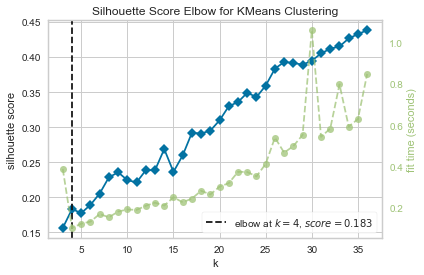

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

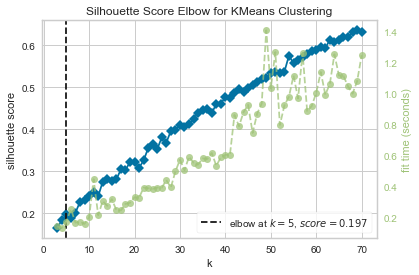

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

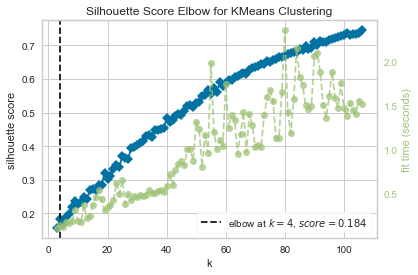

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

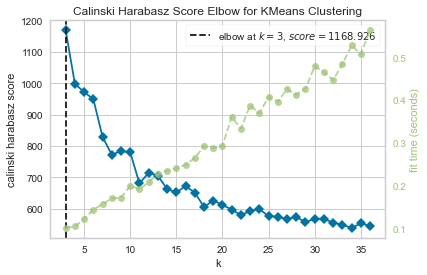

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [29]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

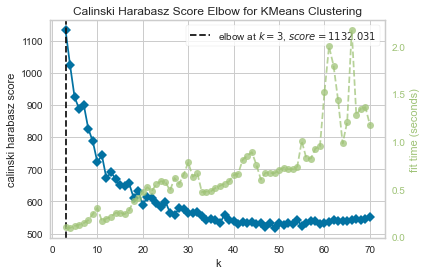

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [30]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

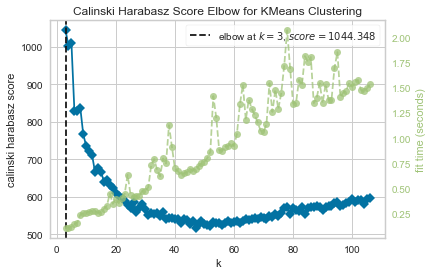

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [31]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

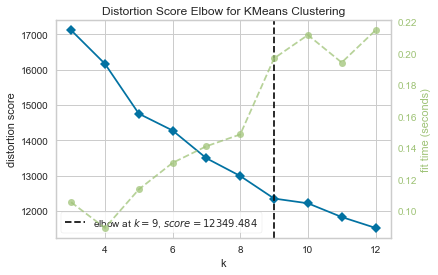

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,13), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

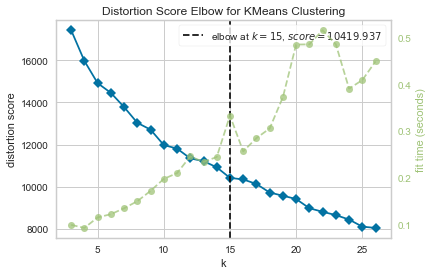

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,27), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

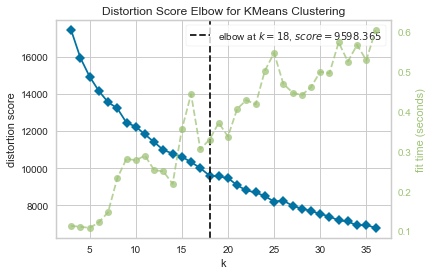

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

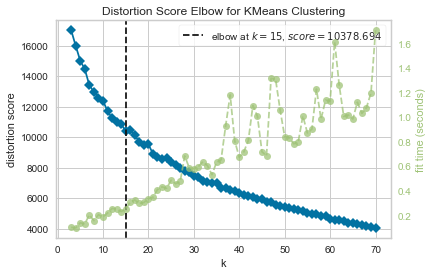

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

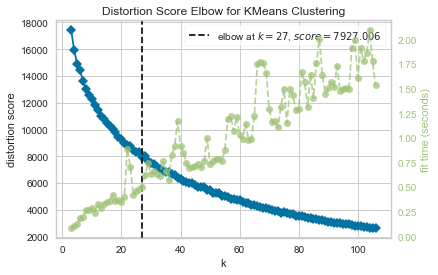

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

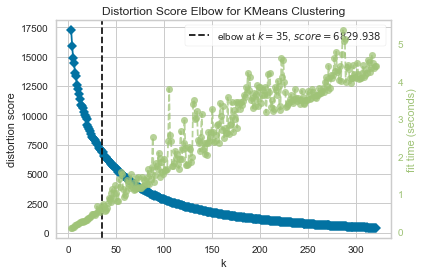

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,(3*107)), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

In [38]:
# training

kmeans_model = KMeans(n_clusters = 3, random_state=0)
y_Kmeans3 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans3)
print(np.unique(y_Kmeans3))
print(len(np.unique(y_Kmeans3)))
print(f'Amount genre: {len(group_dummies.columns)}')

[0 1 1 ... 0 0 2]
[0 1 2]
3
Amount genre: 108


In [39]:
kmeans_model = KMeans(n_clusters = 13, random_state=0)
y_Kmeans13 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans13)
print(np.unique(y_Kmeans13))
print(len(np.unique(y_Kmeans13)))
print(f'Amount genre: {len(group_dummies.columns)}')

[12  6  0 ...  1  8  5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
13
Amount genre: 108


In [40]:
kmeans_model = KMeans(n_clusters = 27, random_state=0)
y_Kmeans27 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans27)
print(np.unique(y_Kmeans27))
print(len(np.unique(y_Kmeans27)))
print(f'Amount genre: {len(group_dummies.columns)}')

[25  7  4 ...  6 14  0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
27
Amount genre: 108


In [41]:
kmeans_model = KMeans(n_clusters = 37, random_state=0)
y_Kmeans37 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans37)
print(np.unique(y_Kmeans37))
print(len(np.unique(y_Kmeans37)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 8 11 27 ... 12  3 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
37
Amount genre: 108


In [42]:
kmeans_model = KMeans(n_clusters = 71, random_state=0)
y_Kmeans71 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans71)
print(np.unique(y_Kmeans71))
print(len(np.unique(y_Kmeans71)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 8 55 10 ...  4  9  1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
71
Amount genre: 108


In [43]:
kmeans_model = KMeans(n_clusters = 107, random_state=0)
y_Kmeans107 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans107)
print(np.unique(y_Kmeans107))
print(len(np.unique(y_Kmeans107)))
print(f'Amount genre: {len(group_dummies.columns)}')

[14 16 83 ... 50  8 80]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
107
Amount genre: 108


In [44]:
kmeans_model = KMeans(n_clusters = 34, random_state=0)
y_Kmeans34 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans34)
print(np.unique(y_Kmeans34))
print(len(np.unique(y_Kmeans34)))
print(f'Amount genre: {len(group_dummies.columns)}')

[10 29  4 ... 16 18 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
34
Amount genre: 108


In [45]:
data_netflix_cluster = data_netflix.copy()

In [46]:
data_netflix_cluster['clusters_genre'] = y_Kmeans34

In [47]:
data_netflix_cluster.head()

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
0,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,uninformed cast,United States,"September 25, 2021",2020,90 min,DOCUMENTARIES,"As her father nears the end of his life, filmm...",10
1,TV Show,BLOOD & WATER,uninformed director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES","After crossing paths at a party, a Cape Town t...",29
2,TV Show,GANGLANDS,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",uninformed country,"September 24, 2021",2021,1 Season,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...",To protect his family from a powerful drug lor...,4
3,TV Show,JAILBIRDS NEW ORLEANS,uninformed director,uninformed cast,uninformed country,"September 24, 2021",2021,1 Season,"DOCUSERIES, REALITY TV","Feuds, flirtations and toilet talk go down amo...",13
4,TV Show,KOTA FACTORY,uninformed director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...",In a city of coaching centers known to train I...,9


In [48]:
name = 'The Stronghold'.upper()
data_netflix_cluster[data_netflix_cluster['title'] ==  name] 

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
36,Movie,THE STRONGHOLD,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",uninformed country,"September 17, 2021",2021,105 min,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES","Tired of the small-time grind, three Marseille...",33


In [49]:
data_netflix_cluster[data_netflix_cluster['title'] ==  name][['clusters_genre', 'gender_type']]

,clusters_genre,gender_type
36,33,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"


In [50]:
data_netflix_cluster[data_netflix_cluster['clusters_genre'] ==  10 ][['title', 'gender_type']]

,title,gender_type
0,DICK JOHNSON IS DEAD,DOCUMENTARIES
45,MY HEROES WERE COWBOYS,DOCUMENTARIES
117,FINAL ACCOUNT,DOCUMENTARIES
221,"BOB ROSS: HAPPY ACCIDENTS, BETRAYAL & GREED",DOCUMENTARIES
304,LADY BOSS: THE JACKIE COLLINS STORY,DOCUMENTARIES
...,...,...
8723,WHAT MAKES A PSYCHOPATH?,DOCUMENTARIES
8737,WHY ARE WE GETTING SO FAT?,DOCUMENTARIES
8738,WHY KNOT,DOCUMENTARIES
8739,WHY WE FIGHT: THE BATTLE OF RUSSIA,DOCUMENTARIES


In [51]:
from dataclasses import dataclass

@dataclass
class QueryRecommends:
    dataset: pd.core.frame.DataFrame
    name: str 
    top_n: int = 10

def recommends(query: QueryRecommends) -> pd.core.frame.DataFrame:
    result = query['dataset'][query['dataset']['title'] == query['name'].upper()][['clusters_genre']].reset_index()
    result = result.at[0, 'clusters_genre']
    return query['dataset'][query['dataset']['clusters_genre'] == int(result)][['title', 'gender_type']][:query['top_n']]

In [52]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Narcos', 'top_n': 10})
result

,title,gender_type
2,GANGLANDS,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT..."
11,BANGKOK BREAKING,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT..."
17,FALSA IDENTIDAD,"CRIME TV SHOWS, SPANISH-LANGUAGE TV SHOWS, TV ..."
82,LUCIFER,"CRIME TV SHOWS, TV COMEDIES, TV DRAMAS"
198,KING OF BOYS: THE RETURN OF THE KING,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"
260,THE DEFEATED,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"
273,GONE FOR GOOD,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"
385,HOW TO SELL DRUGS ONLINE (FAST),"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV COM..."
435,TOUCH YOUR HEART,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, ROMANT..."
503,THE MIRE,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"


In [53]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'The Stronghold', 'top_n': 10})
result

,title,gender_type
36,THE STRONGHOLD,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
215,SHOOTOUT AT LOKHANDWALA,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
350,SPACE COWBOYS,"ACTION & ADVENTURE, DRAMAS, SCI-FI & FANTASY"
451,TWILIGHT,"ACTION & ADVENTURE, DRAMAS, ROMANTIC MOVIES"
481,HOW I BECAME A SUPERHERO,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
687,JAGAME THANDHIRAM,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
712,SILVER SKATES,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
801,NEVER BACK DOWN 2: THE BEATDOWN,"ACTION & ADVENTURE, DRAMAS, SPORTS MOVIES"
806,SEVEN SOULS IN THE SKULL CASTLE: SEASON MOON J...,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
807,SEVEN SOULS IN THE SKULL CASTLE: SEASON MOON K...,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"


In [54]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Zombieland', 'top_n': 10})
result

,title,gender_type
9,THE STARLING,"COMEDIES, DRAMAS"
113,AFTERLIFE OF THE PARTY,"COMEDIES, ROMANTIC MOVIES"
144,HOUSE PARTY,"COMEDIES, CULT MOVIES"
145,HOUSE PARTY 2,"COMEDIES, CULT MOVIES, MUSIC & MUSICALS"
146,HOUSE PARTY 3,"COMEDIES, MUSIC & MUSICALS"
158,LOVE DON'T COST A THING,"COMEDIES, ROMANTIC MOVIES"
161,MARS ATTACKS!,"COMEDIES, CULT MOVIES, SCI-FI & FANTASY"
163,MY BOSS'S DAUGHTER,"COMEDIES, ROMANTIC MOVIES"
172,SCHOOL OF ROCK,"COMEDIES, MUSIC & MUSICALS"
179,THE NUTTY PROFESSOR,"COMEDIES, ROMANTIC MOVIES"


In [55]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Yu-Gi-Oh! Arc-V', 'top_n': 10})
result

,title,gender_type
3,JAILBIRDS NEW ORLEANS,"DOCUSERIES, REALITY TV"
8,THE GREAT BRITISH BAKING SHOW,"BRITISH TV SHOWS, REALITY TV"
66,RAJA RASOI AUR ANYA KAHANIYAN,"DOCUSERIES, INTERNATIONAL TV SHOWS"
76,YOWAMUSHI PEDAL,"ANIME SERIES, INTERNATIONAL TV SHOWS"
85,POKÉMON MASTER JOURNEYS: THE SERIES,"ANIME SERIES, KIDS' TV"
98,OCTONAUTS: ABOVE & BEYOND,"BRITISH TV SHOWS, KIDS' TV"
102,COUNTDOWN: INSPIRATION4 MISSION TO SPACE,"DOCUSERIES, SCIENCE & NATURE TV"
154,KUROKO'S BASKETBALL,"ANIME SERIES, INTERNATIONAL TV SHOWS, TEEN TV ..."
166,ONCE UPON A TIME IN AMERICA,"CLASSIC MOVIES, DRAMAS"
213,RIDE ON TIME,"DOCUSERIES, INTERNATIONAL TV SHOWS"
